# Test the metrics of individual mobility patterns associated with social segregation

In [1]:
%load_ext autoreload
%autoreload 2
%cd D:\mobi-social-segregation-se

D:\mobi-social-segregation-se


In [71]:
# Load libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lib import metrics as mt

## 1. Load data

In [43]:
indi = mt.MobilityMeasuresIndividual()
indi.load_home_seg_uid()
indi.load_mobi_data()

Loading home and segregation data.
Loading mobility data.
Converting it to scikit-learn format.


## 2. Calculate individual mobility metrics
### 2.1 Radius of gyration

In [5]:
df_rg = indi.rg()
df_rg.head()

100%|██████████| 136065/136065 [03:47<00:00, 598.59it/s]


,uid,radius_of_gyration
0,00009689-c524-4a99-95d8-a2397d87db62,9.737627
1,0000cd68-c931-4e3c-96f6-7c5837f59b08,23.199152
2,0000f6ad-ffa4-4af2-9c2a-49d6dc86ec3a,23.028498
3,000115f0-937a-4716-8d8b-09b1ed54c5ce,36.245145
4,00018710-0383-4789-a694-d6fd7891626c,99.109782


### 2.2 Average trip distance (displacement)

In [6]:
df_avd = indi.displacement_average()
df_avd.head()

100%|██████████| 136065/136065 [00:10<00:00, 13501.02it/s]


,uid,distance_straight_line,number_of_visits,disp_ave
0,00009689-c524-4a99-95d8-a2397d87db62,151.474300,29,5.409796
1,0000cd68-c931-4e3c-96f6-7c5837f59b08,1888.092452,351,5.394550
2,0000f6ad-ffa4-4af2-9c2a-49d6dc86ec3a,844.520082,61,14.075335
3,000115f0-937a-4716-8d8b-09b1ed54c5ce,1922.812064,343,5.622257
4,00018710-0383-4789-a694-d6fd7891626c,1442.084913,11,144.208491


### 2.3 Number of unique locations (by coordinates)

In [8]:
df_num = indi.num_locations()
df_num.head()

100%|██████████| 136065/136065 [05:01<00:00, 451.00it/s]


,uid,number_of_locations
0,00009689-c524-4a99-95d8-a2397d87db62,26
1,0000cd68-c931-4e3c-96f6-7c5837f59b08,225
2,0000f6ad-ffa4-4af2-9c2a-49d6dc86ec3a,7
3,000115f0-937a-4716-8d8b-09b1ed54c5ce,292
4,00018710-0383-4789-a694-d6fd7891626c,2


### 2.4 Median value of distance to home

In [12]:
df_dist2home = indi.dist_to_home_median()
df_dist2home.head()

Merge data.


100%|██████████| 22337738/22337738 [07:47<00:00, 47786.22it/s]


,uid,dist2home
0,00009689-c524-4a99-95d8-a2397d87db62,4.425807e+00
1,0000cd68-c931-4e3c-96f6-7c5837f59b08,2.478542e-01
2,0000f6ad-ffa4-4af2-9c2a-49d6dc86ec3a,2.069386e+01
3,000115f0-937a-4716-8d8b-09b1ed54c5ce,2.294896e+00
4,00018710-0383-4789-a694-d6fd7891626c,1.414646e-12


## 3. Combine mobility metrics with social segregation indicators
### 3.1 Organize mobility metrics

In [51]:
df_mobi = pd.concat([df.set_index('uid') for df in [df_avd, df_rg, df_dist2home, df_num]], axis=1).reset_index()
df_mobi = df_mobi.loc[:, ['uid', 'number_of_locations', 'number_of_visits',
                          'disp_ave', 'radius_of_gyration', 'dist2home']]
df_mobi = df_mobi.rename(columns={'disp_ave': 'average_displacement', 'dist2home': 'median_distance_from_home'})
df_mobi.head()

,uid,number_of_locations,number_of_visits,average_displacement,radius_of_gyration,median_distance_from_home
0,00009689-c524-4a99-95d8-a2397d87db62,26,29,5.409796,9.737627,4.425807e+00
1,0000cd68-c931-4e3c-96f6-7c5837f59b08,225,351,5.394550,23.199152,2.478542e-01
2,0000f6ad-ffa4-4af2-9c2a-49d6dc86ec3a,7,61,14.075335,23.028498,2.069386e+01
3,000115f0-937a-4716-8d8b-09b1ed54c5ce,292,343,5.622257,36.245145,2.294896e+00
4,00018710-0383-4789-a694-d6fd7891626c,2,11,144.208491,99.109782,1.414646e-12


### 3.2 Connect with segregation metrics by home location

In [52]:
df_mobi = pd.merge(df_mobi, indi.home.loc[:, ['uid', 'deso']].rename(columns={'deso': 'region'}), on=['uid'])
df_mobi.head()

,uid,number_of_locations,number_of_visits,average_displacement,radius_of_gyration,median_distance_from_home,region
0,00009689-c524-4a99-95d8-a2397d87db62,26,29,5.409796,9.737627,4.425807e+00,1283C1670
1,0000cd68-c931-4e3c-96f6-7c5837f59b08,225,351,5.394550,23.199152,2.478542e-01,1980C1570
2,0000f6ad-ffa4-4af2-9c2a-49d6dc86ec3a,7,61,14.075335,23.028498,2.069386e+01,0883C1020
3,000115f0-937a-4716-8d8b-09b1ed54c5ce,292,343,5.622257,36.245145,2.294896e+00,0125C1060
4,00018710-0383-4789-a694-d6fd7891626c,2,11,144.208491,99.109782,1.414646e-12,1862C1010


In [53]:
for v in ('income', 'birth_region', 'background'):
    df_mobi = pd.merge(df_mobi, indi.resi_seg.loc[indi.resi_seg['var'] == v,
                                                  ['region', 'S', 'iso']].rename(columns={'S': f'S_{v}',
                                                                                          'iso': f'iso_{v}'}), on=['region'])
df_mobi.head()

,uid,number_of_locations,number_of_visits,average_displacement,radius_of_gyration,median_distance_from_home,region,S_income,iso_income,S_birth_region,iso_birth_region,S_background,iso_background
0,00009689-c524-4a99-95d8-a2397d87db62,26,29,5.409796,9.737627,4.425807,1283C1670,0.206667,0.000019,0.809034,0.000019,0.657983,0.000026
1,208c8c0c-0d53-406d-b64b-e0ddd89367d3,1135,1374,7.485136,30.938548,0.353418,1283C1670,0.206667,0.000019,0.809034,0.000019,0.657983,0.000026
2,3ac56259-ae06-495d-a1b0-381890b4d380,917,1709,8.692565,159.103344,0.422506,1283C1670,0.206667,0.000019,0.809034,0.000019,0.657983,0.000026
3,5449c4cb-92ca-47b4-adef-bd0183ef7145,682,836,6.944670,124.574894,7.725128,1283C1670,0.206667,0.000019,0.809034,0.000019,0.657983,0.000026
4,600f8e10-27a8-4690-9ea2-086f4261fc30,185,185,11.343039,18.305368,8.400205,1283C1670,0.206667,0.000019,0.809034,0.000019,0.657983,0.000026


Connect also with zonal statistics

In [54]:
df_mobi = pd.merge(df_mobi, indi.zone_stats, on=['region'])
df_mobi.head()

,uid,number_of_locations,number_of_visits,average_displacement,radius_of_gyration,median_distance_from_home,region,S_income,iso_income,S_birth_region,iso_birth_region,S_background,iso_background,Foreign background,Not Sweden,Lowest income group
0,00009689-c524-4a99-95d8-a2397d87db62,26,29,5.409796,9.737627,4.425807,1283C1670,0.206667,0.000019,0.809034,0.000019,0.657983,0.000026,0.171008,0.127311,0.15
1,208c8c0c-0d53-406d-b64b-e0ddd89367d3,1135,1374,7.485136,30.938548,0.353418,1283C1670,0.206667,0.000019,0.809034,0.000019,0.657983,0.000026,0.171008,0.127311,0.15
2,3ac56259-ae06-495d-a1b0-381890b4d380,917,1709,8.692565,159.103344,0.422506,1283C1670,0.206667,0.000019,0.809034,0.000019,0.657983,0.000026,0.171008,0.127311,0.15
3,5449c4cb-92ca-47b4-adef-bd0183ef7145,682,836,6.944670,124.574894,7.725128,1283C1670,0.206667,0.000019,0.809034,0.000019,0.657983,0.000026,0.171008,0.127311,0.15
4,600f8e10-27a8-4690-9ea2-086f4261fc30,185,185,11.343039,18.305368,8.400205,1283C1670,0.206667,0.000019,0.809034,0.000019,0.657983,0.000026,0.171008,0.127311,0.15


## 4. Correlation between individual mobility metrics (zonal median) and residential metrics including segregation measures

In [57]:
df_mobi_by_region = df_mobi.groupby('region').mean().reset_index()
df_mobi_by_region.head()

,region,number_of_locations,number_of_visits,average_displacement,radius_of_gyration,median_distance_from_home,S_income,iso_income,S_birth_region,iso_birth_region,S_background,iso_background,Foreign background,Not Sweden,Lowest income group
0,0114A0010,228.857143,292.714286,26.177377,70.497502,21.707889,0.160000,0.000014,0.768354,0.000009,0.625316,0.000011,0.187342,0.154430,0.21
1,0114C1010,99.000000,118.500000,28.063989,92.261691,10.825019,0.246667,0.000013,0.706157,0.000031,0.480100,0.000041,0.259950,0.195896,0.15
2,0114C1020,163.882353,209.235294,14.877460,63.506129,48.369580,0.240000,0.000013,0.729814,0.000026,0.437267,0.000048,0.281366,0.180124,0.15
3,0114C1030,97.000000,137.222222,6.623337,35.168969,1.278918,0.186667,0.000026,0.739323,0.000035,0.520507,0.000052,0.239746,0.173784,0.17
4,0114C1040,59.412698,90.634921,18.797958,44.111743,15.800862,0.093333,0.000057,0.436061,0.000164,0.004263,0.000224,0.502131,0.375959,0.25


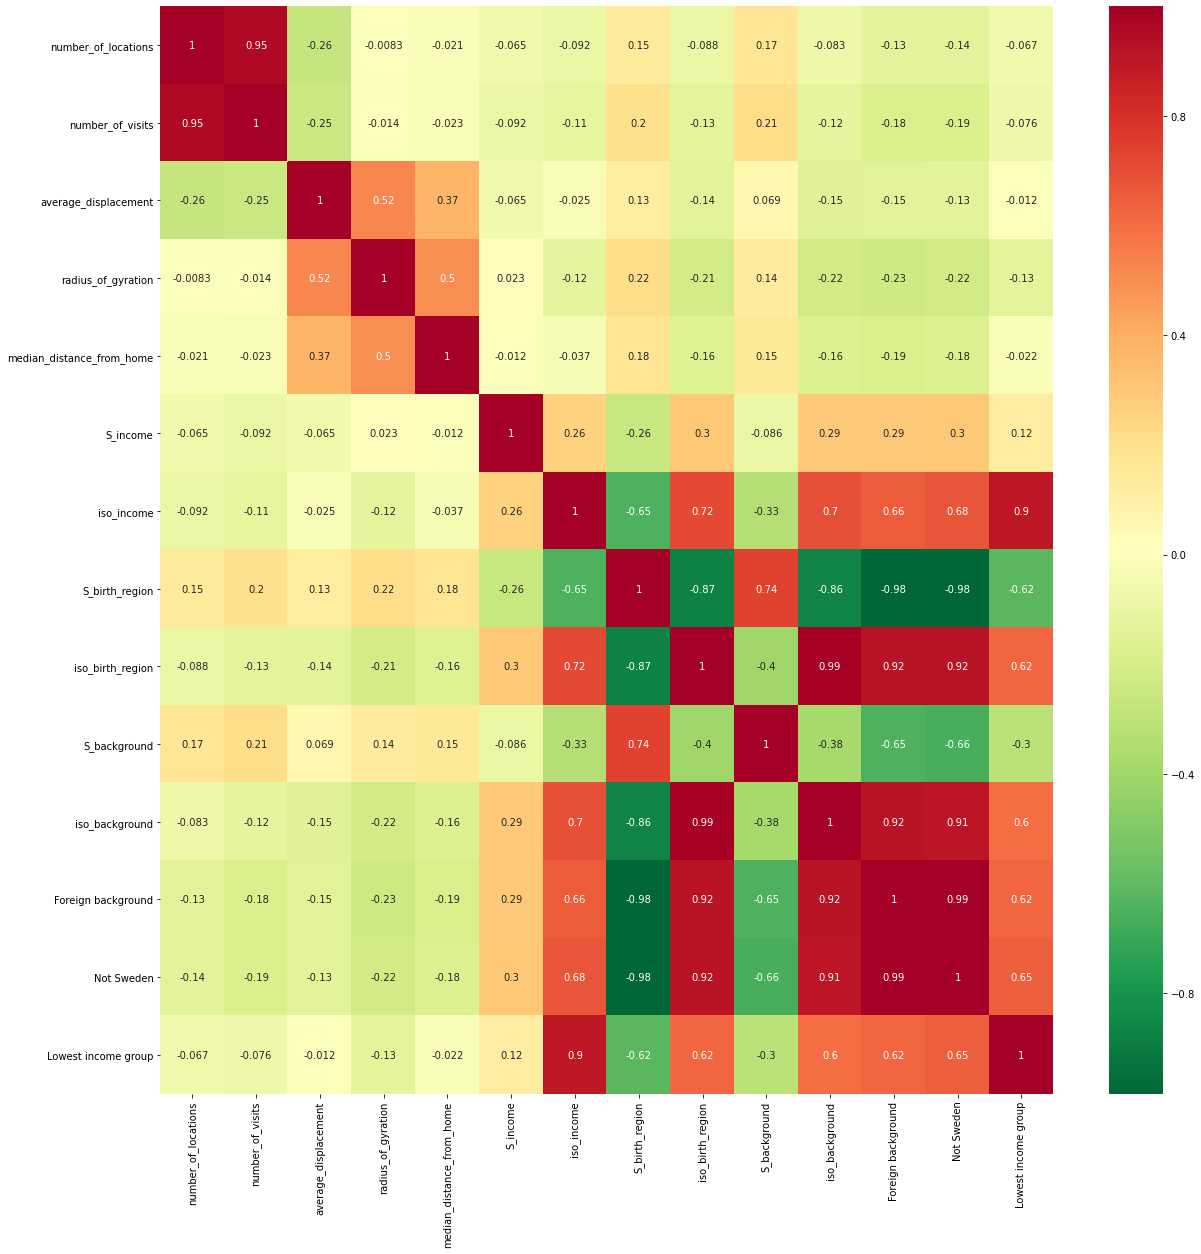

In [58]:
#get correlations of each features in dataset
corrmat = df_mobi_by_region.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_mobi_by_region[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")
plt.show() # ta-da!

### 4.1 Compact version focusing on rg vs. residential segregation on Foreign background and income

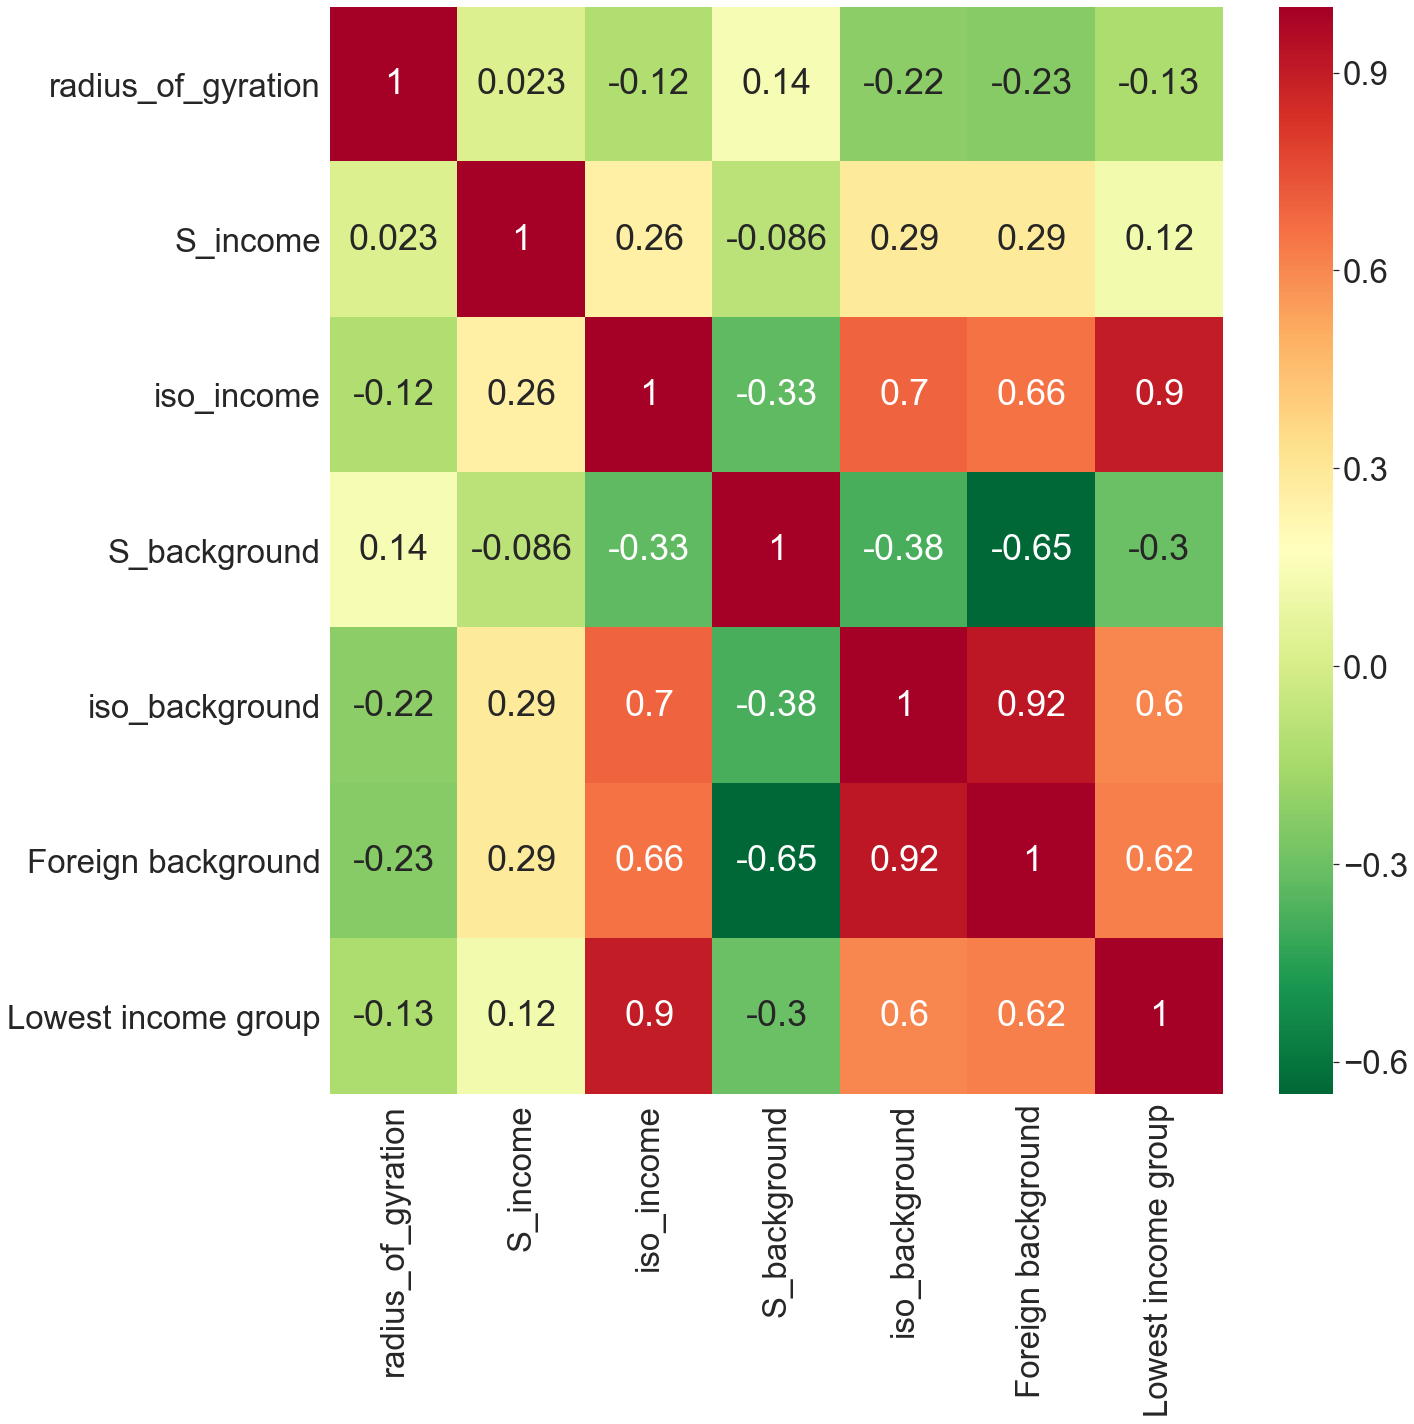

In [72]:
cols = ['region', 'radius_of_gyration', 'S_income', 'iso_income', 'S_background', 'iso_background',
       'Foreign background', 'Lowest income group']
#get correlations of each features in dataset
X = df_mobi_by_region.loc[:, cols]
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")
sns.set(font_scale=5)
plt.show() # ta-da!